## Bowel cancer prediction model to predict the percentage of participants across Australia.

#### Importing the required packages

In [14]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#### Loading dataset and transforming it into dataframe, and displaying head records of dataframe.

In [6]:
df=pd.read_csv('/Volumes/DriveB/Machine_Learning/Machine_Learning/Bowel_Cancer1.csv')
df.head()

,State_and_territory,SA3_name,Year,Participation_Per
0,NSW,Goulburn - Yass,2015,38.5
1,NSW,Queanbeyan,2015,38.9
2,NSW,Snowy Mountains,2015,40.1
3,NSW,South Coast,2015,44.2
4,NSW,Gosford,2015,36.6


### Printing data type of columns.

In [7]:
print(df.dtypes)

State_and_territory     object
SA3_name                object
Year                     int64
Participation_Per      float64
dtype: object


### Assessing null values in the columns.

In [8]:
df.isnull().sum()

State_and_territory    0
SA3_name               0
Year                   0
Participation_Per      0
dtype: int64

### Bar plot of average participation rate by state.

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_30850/1284633038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise_participation.values, y=statewise_participation.index, palette='muted')


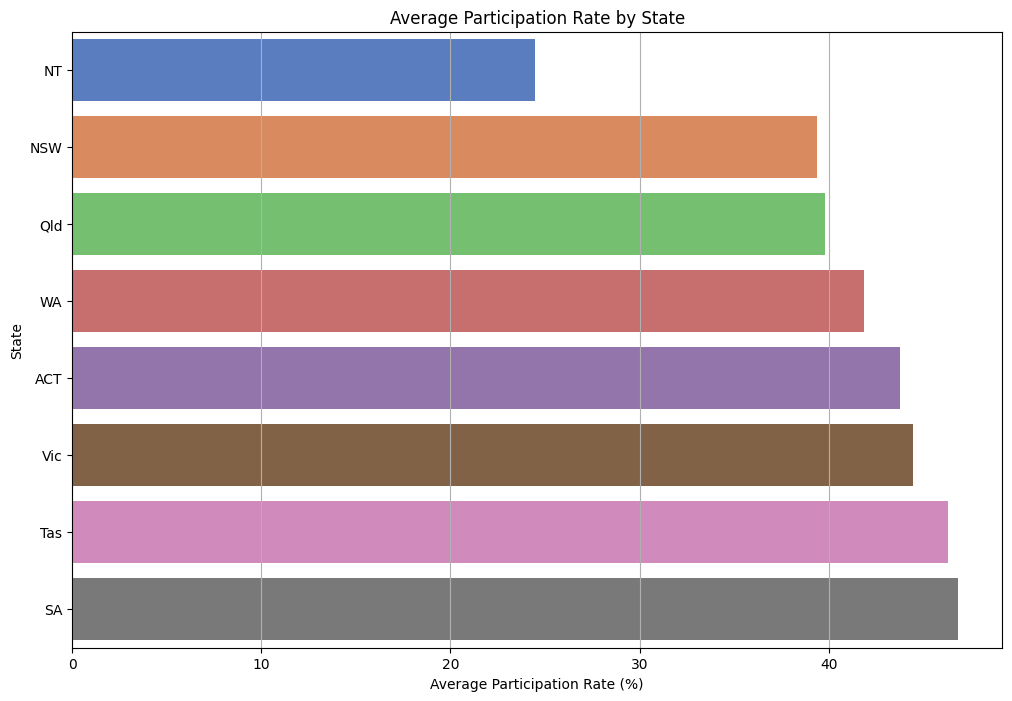

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot of average participation rate by state
statewise_participation = df.groupby('State_and_territory')['Participation_Per'].mean().sort_values()
sns.barplot(x=statewise_participation.values, y=statewise_participation.index, palette='muted')
plt.title('Average Participation Rate by State')
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


### Graph Results: The graph gives the insights that population of South Austraila has participated more.

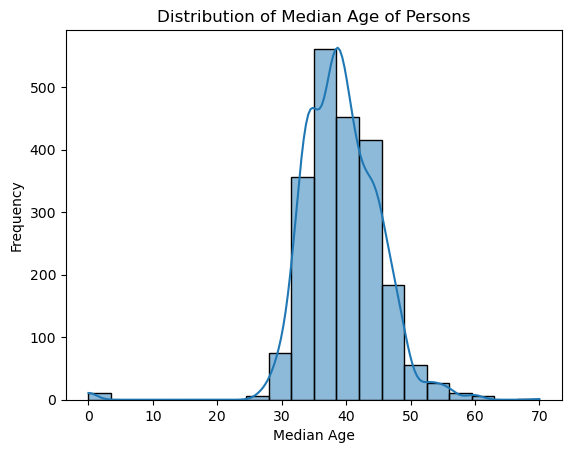

In [20]:
#Distribution of median age of persons
sns.histplot(df['Median_age_of_persons'], bins=20, kde=True,palette='viridis')
plt.title('Distribution of Median Age of Persons')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.show()

### Distribution graph insights : The graph indicates that people who are of aged 35 has participated in the program.

# Model Random Forest Regression

### Split the data into features and target variable and further dividing into train and test set.

In [23]:
X = df.drop(['Participation_Per'], axis=1)
y = df['Participation_Per']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Creating a list of categorical columns, using transformers to build a pipeline for numerical data, instantiating StandardScaler to scale the numerical columns, and using OneHotEncoder to encode categorical data.
#### Passing the transformer into the preprocessor.

In [40]:
categorical_features = ['State_and_territory', 'SA3_name', 'Year']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)


### Passing the Random Forest Regressor model with 50 n_estimators hyperparameter, along with the preprocessor, into the pipeline.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

RandomForestR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])


#### Fitting pipeline to train the model.

In [43]:
RandomForestR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State_and_territory',
                                                   'SA3_name', 'Year'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

#### Performing prediction on train set and assessing the scores using metrics

In [44]:
y_pred_train = RandomForestR_pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
median_train = median_absolute_error(y_train, y_pred_train)

print("The score of mean absolute error on train set is:", mae_train)
print("The score of mean squared error on train set is:", mse_train)
print("The score of median absolute error on train set is:", median_train)

The score of mean absolute error on train set is: 0.7694191201795925
The score of mean squared error on train set is: 1.1357763181882072
The score of median absolute error on train set is: 0.5759999999999721


#### Making predictions on the testing set to evaluate the model and assessing its score using metrics.

In [45]:
y_pred = RandomForestR_pipeline.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
median_test = median_absolute_error(y_test, y_pred)

print("The score of mean absolute error on test set is:", mae_test)
print("The score of mean squared error on test set i:", mse_test)
print("The score of median absolute error on test set is:", median_test)

The score of mean absolute error on test set is: 2.0450915222484967
The score of mean squared error on test set i: 7.512773137105485
The score of median absolute error on test set is: 1.5899999999999963


#### saving model into joblib and this model is deployed on strimlit that predicts the percentange of participants in the coming years.

In [ ]:
from joblib import dump
dump(RandomForestR_pipeline,"/Volumes/DriveA/iLab_work/cervical_cancer/Bowel_Cancer_RandomForestR_1.joblib")

['/Volumes/DriveA/iLab_work/cervical_cancer/Bowel_Cancer_RandomForestR_1.joblib']

### Analysing the performance of model

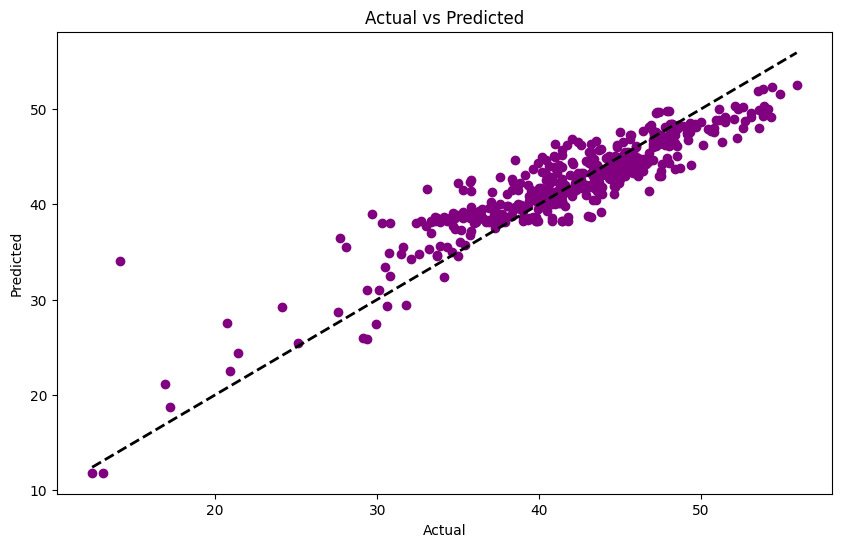

In [32]:
import matplotlib.pyplot as plt

# Making predictions on the test set using the best model
y_pred_best = RandomForestR_pipeline.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### Result : The graph shows model cannot learn the unseen data very well, outliers are detected.

### Metrics analysis
##### The score of mean absolute error on train set is: 0.7694191201795925
##### The score of mean squared error on train set is: 1.1357763181882072
##### The score of median absolute error on train set is: 0.5759999999999721

##### The score of mean absolute error on test set is: 2.0450915222484967
##### The score of mean squared error on test set i: 7.512773137105485
##### The score of median absolute error on test set is: 1.5899999999999963

### Outcome of prediction: The score gives the insight that model is underfitting.